In [4]:
# Importing all the required libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
# Reading the data and printing the missing values

data = pd.read_csv("CC_GENERAL.csv")
missing_data = data.isna().sum()
print(missing_data)


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


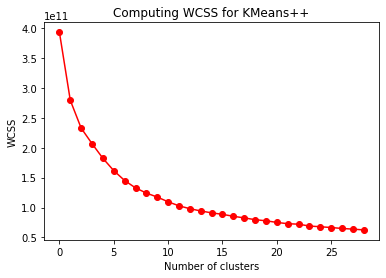

In [8]:
data = data.fillna( data.median() )

# Let's assume we use all cols except CustomerID
vals = data.iloc[ :, 1:].values

from sklearn.cluster import KMeans
# Use the Elbow method to find a good number of clusters using WCSS
wcss = []
for ii in range( 1, 30 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( vals )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


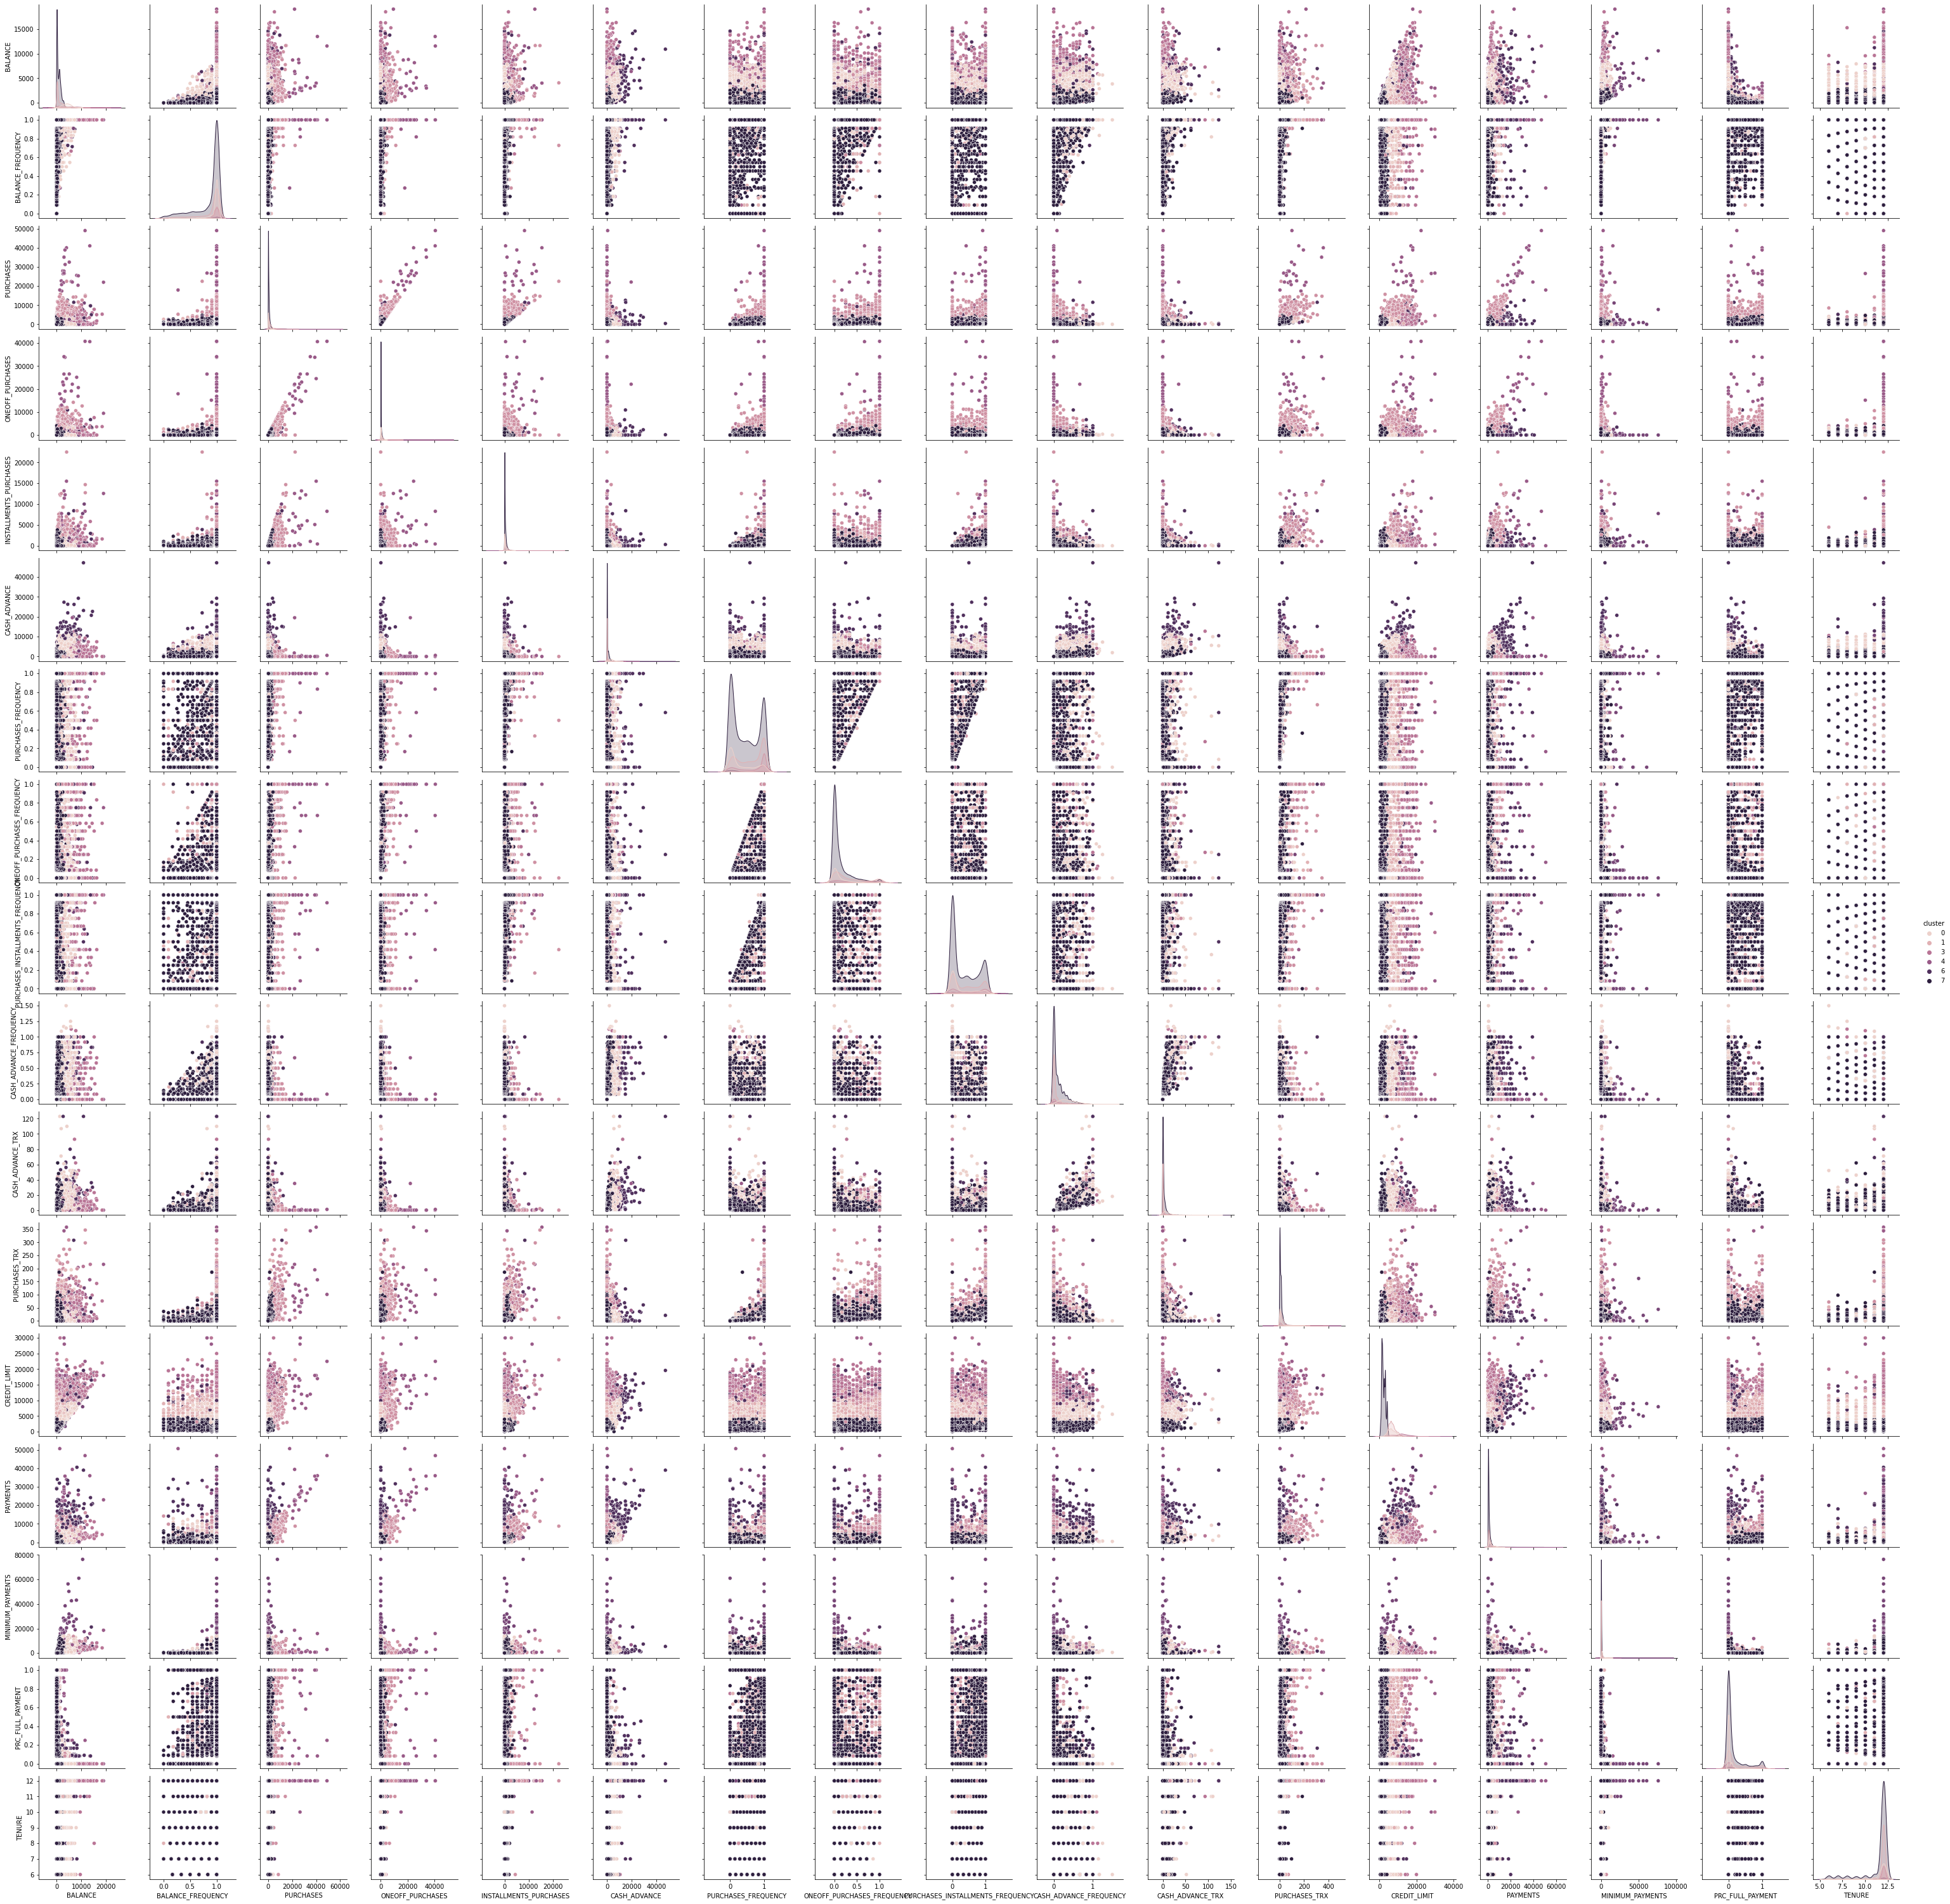

In [9]:
# choosing the number of cluster = 8, because the data is high dimensional, more than 8 cluster its difficult visualize

kmeans = KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=300) 
y_pred = kmeans.fit_predict( vals )

 
import seaborn as sns
data["cluster"] = y_pred
cols = list(data.columns)
cols.remove("CUST_ID")

sns.pairplot( data[ cols ], hue="cluster")

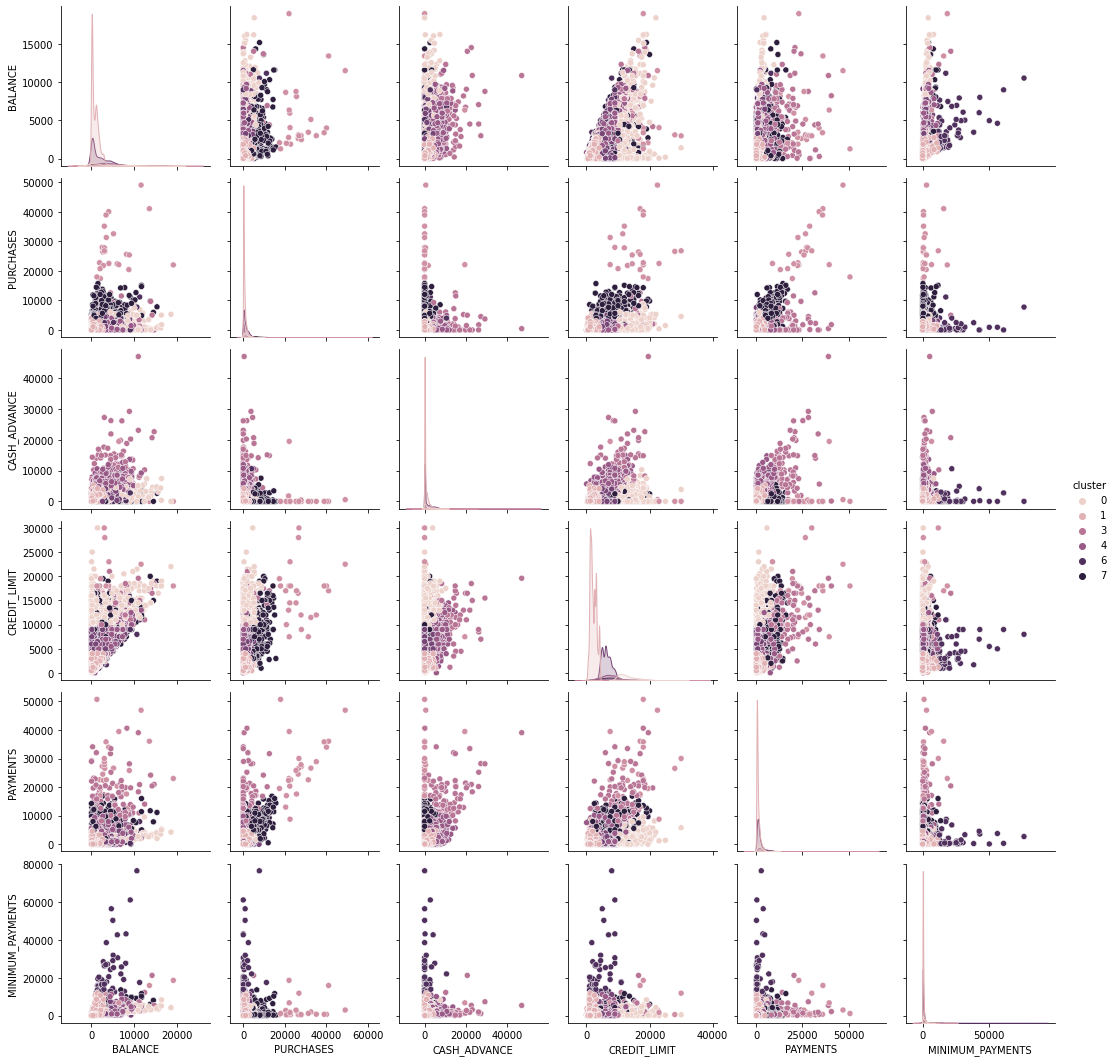

In [10]:

# Repeating with only columns that clustering seems to have sepearated the more clearly 

best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
kmeans = KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=300) 
best_vals = data[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( best_vals )

data["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( data[ best_cols ], hue="cluster")